# 1.carga de datos y Drive

In [2]:
# Conectar con el almacenamiento de GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subset_preprocessed.csv')
# columnas para el entrenamiento
df = df[['sentiment','reviewText']]
print(f'el shape del dataframe es: {df.shape}')
print(f'\nvisulaización 5 primeras instancias: \n{df.head()}')
print(f'\nvisulaización 5 últimas instancias: \n{df.tail()}')

el shape del dataframe es: (28388, 2)

visulaización 5 primeras instancias: 
   sentiment                                         reviewText
0          1                     nice big bag clothe device dry
1          0  cheap light small long bike rack coil snuggly ...
2          1  bean bag cornhole bag case strong sturdy updat...
3          1  pillow animal outside soft idea get colt beat ...
4          1  little girl doesn love pink tennis ball please...

visulaización 5 últimas instancias: 
       sentiment                                         reviewText
28383          1                                              great
28384          1               sound good easy use star rating buck
28385          1                          want love year later leak
28386          0           fit improve lot fitting require accuracy
28387          1  start say stuff work owner reviewer comment go...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28388 entries, 0 to 28387
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   28388 non-null  int64 
 1   reviewText  28224 non-null  object
dtypes: int64(1), object(1)
memory usage: 443.7+ KB


In [16]:
df = df.dropna().drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25681 entries, 0 to 28387
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   25681 non-null  int64 
 1   reviewText  25681 non-null  object
dtypes: int64(1), object(1)
memory usage: 601.9+ KB


In [18]:
print(f'el shape del dataframe es: {df.shape}')
print(f'\nvisulaización 5 primeras instancias: \n{df.head()}')
print(f'\nvisulaización 5 últimas instancias: \n{df.tail()}')

el shape del dataframe es: (25681, 2)

visulaización 5 primeras instancias: 
   sentiment                                         reviewText
0          1                     nice big bag clothe device dry
1          0  cheap light small long bike rack coil snuggly ...
2          1  bean bag cornhole bag case strong sturdy updat...
3          1  pillow animal outside soft idea get colt beat ...
4          1  little girl doesn love pink tennis ball please...

visulaización 5 últimas instancias: 
       sentiment                                         reviewText
28382          0  amazon incorrectly list tarp 8x10 size weigh w...
28384          1               sound good easy use star rating buck
28385          1                          want love year later leak
28386          0           fit improve lot fitting require accuracy
28387          1  start say stuff work owner reviewer comment go...


# 2.División train y Test

In [19]:
from sklearn.model_selection import train_test_split

#Estratificamos por la variable objetivo
train, test = train_test_split(df, test_size=0.2, stratify=df['sentiment'], random_state=42)

In [23]:
print(f'el shape de train es {train.shape}')
print(f'el shape de test es: {test.shape}')

el shape de train es (20544, 2)
el shape de test es: (5137, 2)


In [24]:
# Guardamos train y test en archivos .csv
train.to_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', index=False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', index=False)

#3.Regresión lineal

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Carga de datasets train y test
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [31]:
# defino función para guardar modelos.pkl
def save_pkl(df,file_name, path='/content/drive/MyDrive/Colab Notebooks/'):
  rute = path + file_name
  with open(rute, 'wb') as f:
    pickle.dump(df, f)

In [32]:
# Separo las características de la variable objetivo
X_train = train['reviewText']
y_train = train['sentiment']

X_test = test['reviewText']
y_test = test['sentiment']


# Guardar los conjuntos de datos
save_pkl(y_train, 'y_train.pkl')
save_pkl(X_train, 'X_train.pkl')
save_pkl(y_test, 'y_test.pkl')
save_pkl(X_test, 'X_test.pkl')

## 3.1 CountVectorizer y TfidfVectorizer

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Función para evaluar diferentes valores de max_features
def evaluate_max_features(max_features_list, reviews, labels):
    results = {}
    for max_features in max_features_list:
        cv = CountVectorizer(ngram_range=(1, 3), max_features=max_features, max_df=0.95, min_df=5)
        X = cv.fit_transform(reviews)
        model = MultinomialNB()
        scores = cross_val_score(model, X, labels, cv=5)
        results[max_features] = scores.mean()
    return results

# Lista de valores de max_features a evaluar
max_features_list = [100, 500, 1000, 2000, 5000]

# Evaluar diferentes valores de max_features
results = evaluate_max_features(max_features_list, X_train, y_train)

# Mostrar resultados
for max_features, score in results.items():
    print(f"max_features: {max_features}, score: {score}")

max_features: 100, score: 0.8308023117847799
max_features: 500, score: 0.8456482350590993
max_features: 1000, score: 0.8547507987667131
max_features: 2000, score: 0.8580605709603187
max_features: 5000, score: 0.8605430215526608


In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# CountVectorizer simple
count_simple = CountVectorizer()
X_train_cv_simple = count_simple.fit_transform(X_train)
X_test_cv_simple = count_simple.transform(X_test)

# Guardar las matrices transformadas
save_pkl(X_train_cv_simple, 'X_train_cv_simple.pkl')
save_pkl(X_test_cv_simple, 'X_test_cv_simple.pkl')

# CountVectorizer con ngrams, max_features, min_df y max_df
cv_complex = CountVectorizer(ngram_range=(1, 3), max_features=5000, max_df=0.95, min_df=5)
X_train_cv_complex = cv_complex.fit_transform(X_train)
X_test_cv_complex = cv_complex.transform(X_test)

save_pkl(X_train_cv_complex, 'X_train_cv_complex.pkl')
save_pkl(X_test_cv_complex, 'X_test_cv_complex.pkl')

# TfIdfVectorizer simple
tfidf_simple = TfidfVectorizer()
X_train_tfidf_simple = tfidf_simple.fit_transform(X_train)
X_test_tfidf_simple = tfidf_simple.transform(X_test)

save_pkl(X_train_tfidf_simple, 'X_train_tfidf_simple.pkl')
save_pkl(X_test_tfidf_simple, 'X_test_tfidf_simple.pkl')

# TfIdfVectorizer complejo
tfidf_complex = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, max_df=0.95, min_df=5)
X_train_tfidf_complex = tfidf_complex.fit_transform(X_train)
X_test_tfidf_complex = tfidf_complex.transform(X_test)

save_pkl(X_train_tfidf_complex, 'X_train_tfidf_complex.pkl')
save_pkl(X_test_tfidf_complex, 'X_test_tfidf_complex.pkl')

##3.2 funciones: Métricas y Regresión lineal

In [35]:
# Definimos función para las métricas
def print_metricas(pred, y_train):
  print('Matriz de confusion en Train:')
  cm = confusion_matrix(y_train, pred)
  print(cm)
  target_names = ['0', '1']
  # Graficar la matriz de confusión
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  print('---------------------------------------------')
  print('Metricas en Train:')
  print(classification_report(y_train, pred))


In [37]:
# Definimos la función de entreneamiento para Regresión lineal
def model_lr(X_train, y_train, C, f):
  param_grid = {'C': C}
  model = LogisticRegression()
  # Crear el objeto GridSearchCV con LogisticRegression
  grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

  # Realizar el ajuste
  grid.fit(X_train, y_train)

  save_pkl(grid, f)

  pred = grid.predict(X_train)
  print_metricas(pred, y_train)

  # Imprimir los mejores parámetros encontrados
  print("Best parameters: {}".format(grid.best_params_))


## 3.3 Entrenamiento modelo counterVectorizer simple

Matriz de confusion en Train:
[[ 1592  1695]
 [  162 17095]]


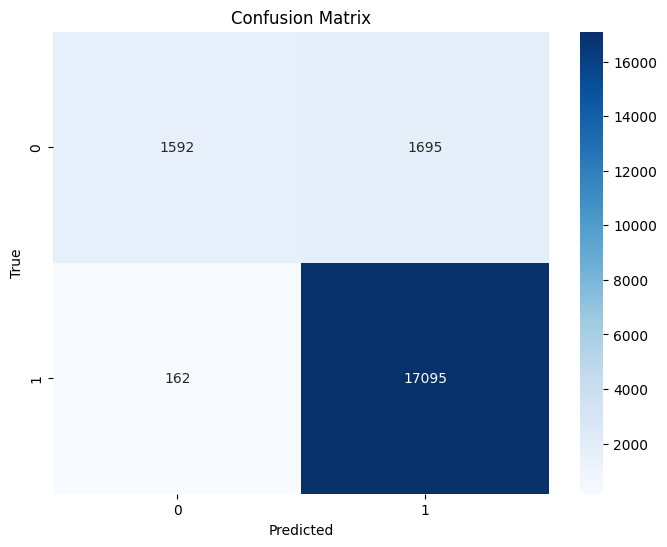

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.91      0.48      0.63      3287
           1       0.91      0.99      0.95     17257

    accuracy                           0.91     20544
   macro avg       0.91      0.74      0.79     20544
weighted avg       0.91      0.91      0.90     20544

Best parameters: {'C': 0.23357214690901212}


In [39]:
C_vector = np.logspace(-4, 4, 20)
file_model = 'lr_model_cv_simple2.pkl'
model_lr(X_train_cv_simple,
         y_train,
         C_vector,
         file_model)

Interpretación de la matriz:


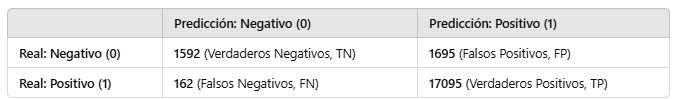


## 3.4 Entrenamiento modelo counterVectorizer complejo

Matriz de confusion en Train:
[[ 1613  1674]
 [  168 17089]]


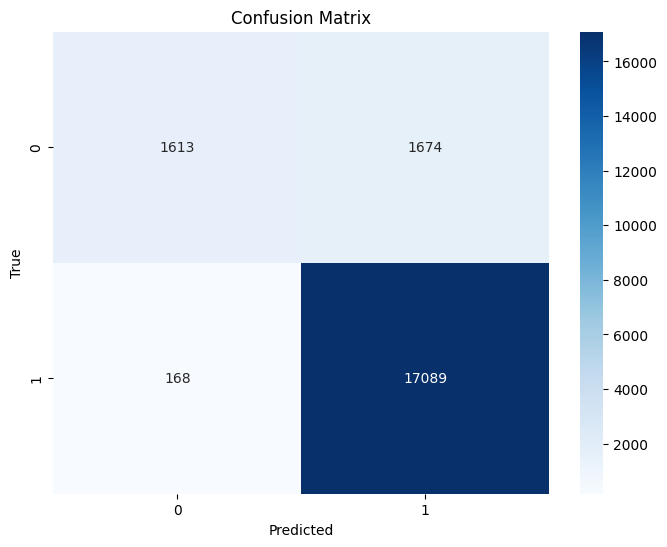

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.91      0.49      0.64      3287
           1       0.91      0.99      0.95     17257

    accuracy                           0.91     20544
   macro avg       0.91      0.74      0.79     20544
weighted avg       0.91      0.91      0.90     20544

Best parameters: {'C': 0.23357214690901212}


In [41]:
C_vector = np.logspace(-4, 4, 20)
file_model = 'lr_model_cv_complex.pkl'
model_lr(X_train_cv_complex,
         y_train,
         C_vector,
         file_model)

## 3.5 Entrenamiento modelo tfidfVectorizer simple

Matriz de confusion en Train:
[[ 1470  1817]
 [  185 17072]]


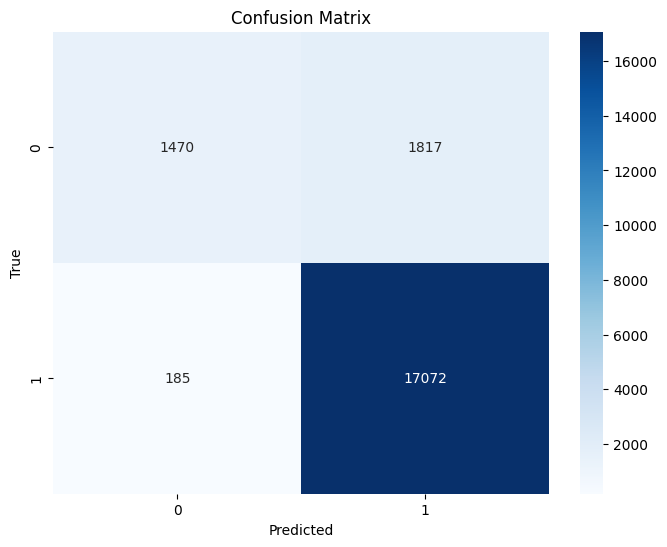

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.89      0.45      0.59      3287
           1       0.90      0.99      0.94     17257

    accuracy                           0.90     20544
   macro avg       0.90      0.72      0.77     20544
weighted avg       0.90      0.90      0.89     20544

Best parameters: {'C': 2.06913808111479}


In [44]:
C_vector = np.logspace(-6, 6, 20)
file_model = 'lr_model_tfidf_simple.pkl'
model_lr(X_train_tfidf_simple,
         y_train,
         C_vector,
         file_model)

## 3.6 Entrenamiento modelo tfidfVectorizer complejo.

Matriz de confusion en Train:
[[ 1534  1753]
 [  193 17064]]


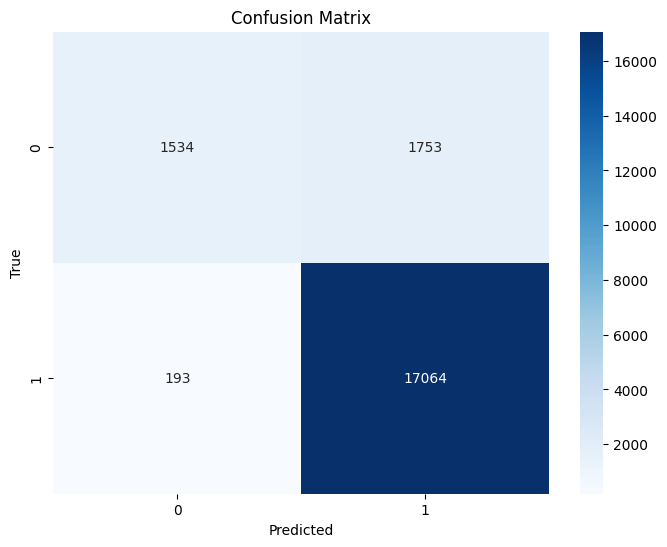

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.89      0.47      0.61      3287
           1       0.91      0.99      0.95     17257

    accuracy                           0.91     20544
   macro avg       0.90      0.73      0.78     20544
weighted avg       0.90      0.91      0.89     20544

Best parameters: {'C': 2.06913808111479}


In [45]:
C_vector = np.logspace(-6, 6, 20)
file_model = 'lr_model_tfidf_complex.pkl'
model_lr(X_train_tfidf_complex,
         y_train,
         C_vector,
         file_model)

#4.Modelo KN-Neighbours

## 4.1 Función: KN-Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

def model_knn(X_train, y_train, N, f):
  param_grid = {
    'n_neighbors': N,
  }
  grid = GridSearchCV(KNeighborsClassifier(),
                      scoring= 'accuracy',
                      param_grid=param_grid, cv = 5, verbose=2)

  grid.fit(X_train, y_train)

  save_pkl(grid, f)

  pred = grid.predict(X_train)
  print_metricas(pred, y_train)

  print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
  print("best parameters: {}".format(grid.best_params_))

  scores = np.array(grid.cv_results_['mean_test_score'])
  stdvalues = np.array(grid.cv_results_['std_test_score'])

  plt.figure(figsize=(10, 6))
  plt.plot(N, scores, '-o')
  plt.errorbar(N, scores, yerr=stdvalues, fmt='o', ecolor='g', capsize=5)
  plt.xlabel('# Neighbors')
  plt.ylabel('5-Fold Accuracy')
  plt.title('K-Neighbors Classifier Performance')
  plt.grid()
  plt.show()

  print("acc (train): {:.2f}".format(grid.score(X_train, y_train)))

## 4.2 Entrenamiento modelo counterVectorizer simple

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ......................................n_neighbors=1; total time=   3.4s
[CV] END ......................................n_neighbors=1; total time=   6.5s
[CV] END ......................................n_neighbors=1; total time=   5.8s
[CV] END ......................................n_neighbors=1; total time=   2.8s
[CV] END ......................................n_neighbors=1; total time=   3.4s
[CV] END ......................................n_neighbors=2; total time=   4.9s
[CV] END ......................................n_neighbors=2; total time=   4.0s
[CV] END ......................................n_neighbors=2; total time=   2.3s
[CV] END ......................................n_neighbors=2; total time=   2.3s
[CV] END ......................................n_neighbors=2; total time=   2.7s
[CV] END ......................................n_neighbors=3; total time=   3.8s
[CV] END ......................................

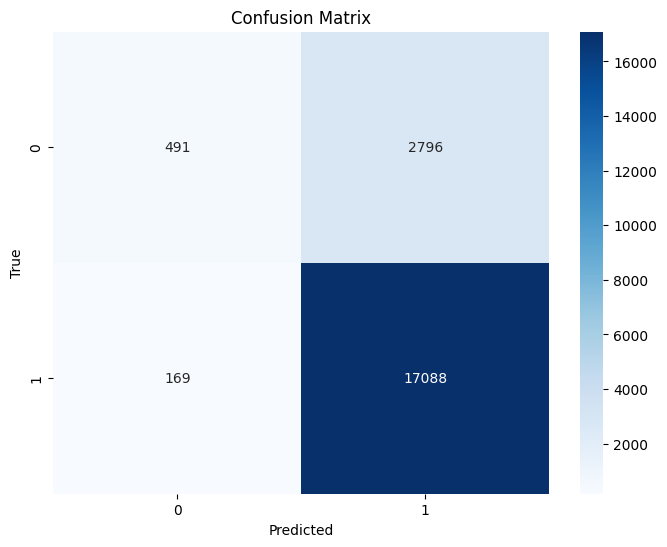

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.74      0.15      0.25      3287
           1       0.86      0.99      0.92     17257

    accuracy                           0.86     20544
   macro avg       0.80      0.57      0.58     20544
weighted avg       0.84      0.86      0.81     20544

best mean cross-validation score: 0.845
best parameters: {'n_neighbors': 11}


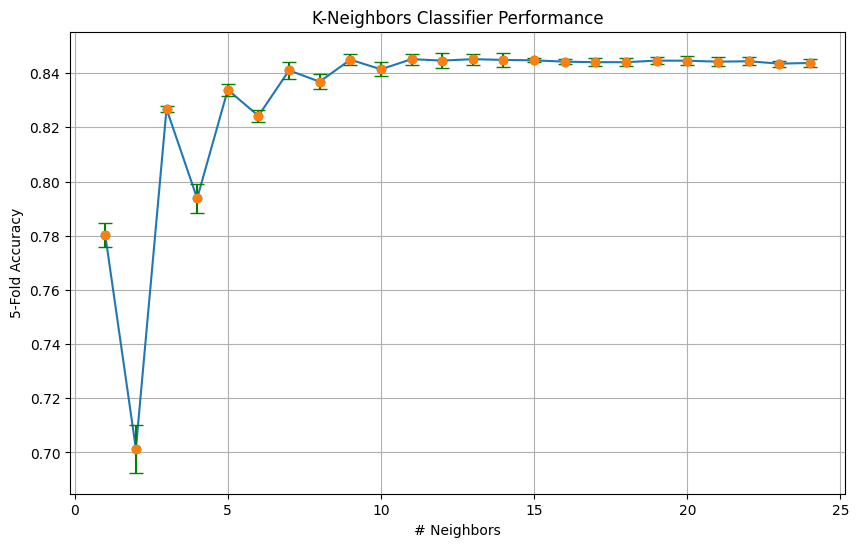

acc (train): 0.86


In [47]:
neighbours = np.arange(1, 25, 1)
file_model = 'model_knn_cv_simple.pkl'
model_knn(X_train_cv_simple, y_train, neighbours,file_model)

## 4.3. Entrenamiento modelo counterVectorizer complejo

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   2.1s
[CV] END ......................................n_neighbors=1; total time=   2.6s
[CV] END ......................................n_neighbors=1; total time=   2.5s
[CV] END ......................................n_neighbors=1; total time=   2.1s
[CV] END ......................................n_neighbors=1; total time=   2.1s
[CV] END ......................................n_neighbors=2; total time=   2.3s
[CV] END ......................................n_neighbors=2; total time=   2.3s
[CV] END ......................................n_neighbors=2; total time=   2.7s
[CV] END ......................................n_neighbors=2; total time=   2.8s
[CV] END ......................................n_neighbors=2; total time=   2.3s
[CV] END ......................................n_neighbors=3; total time=   2.5s
[CV] END ......................................n

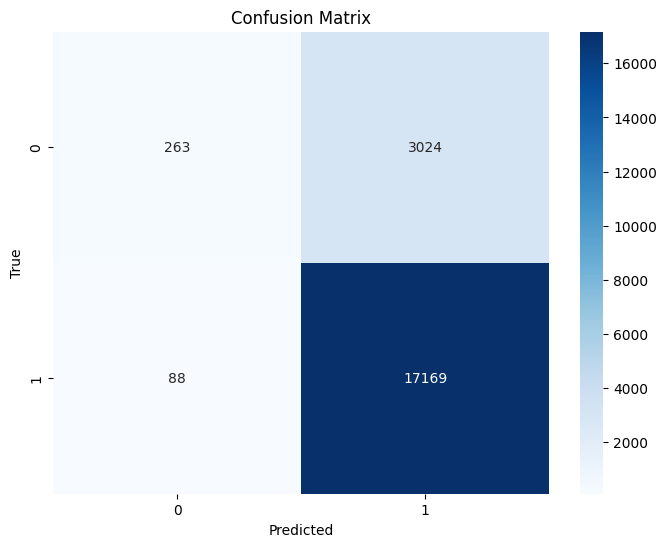

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.75      0.08      0.14      3287
           1       0.85      0.99      0.92     17257

    accuracy                           0.85     20544
   macro avg       0.80      0.54      0.53     20544
weighted avg       0.83      0.85      0.79     20544

best mean cross-validation score: 0.842
best parameters: {'n_neighbors': 15}


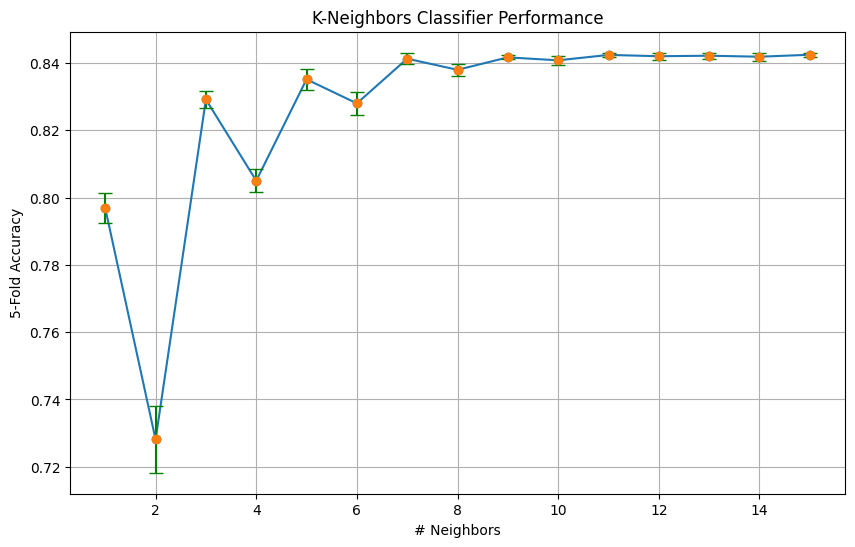

acc (train): 0.85


In [48]:
neighbours = np.arange(1, 16, 1)
file_model = 'model_knn_cv_complex.pkl'
model_knn(X_train_cv_complex,
          y_train,
          neighbours,
          file_model)

## 4.4. Entrenamiento modelo tfidfVectorizer simple.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   2.4s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=2; total time=   2.6s
[CV] END ......................................n_neighbors=2; total time=   2.6s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=3; total time=   2.3s
[CV] END ......................................n

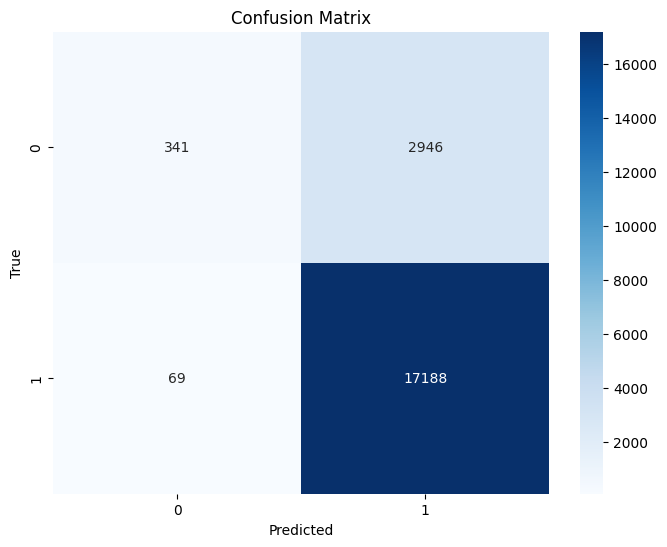

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.83      0.10      0.18      3287
           1       0.85      1.00      0.92     17257

    accuracy                           0.85     20544
   macro avg       0.84      0.55      0.55     20544
weighted avg       0.85      0.85      0.80     20544

best mean cross-validation score: 0.849
best parameters: {'n_neighbors': 15}


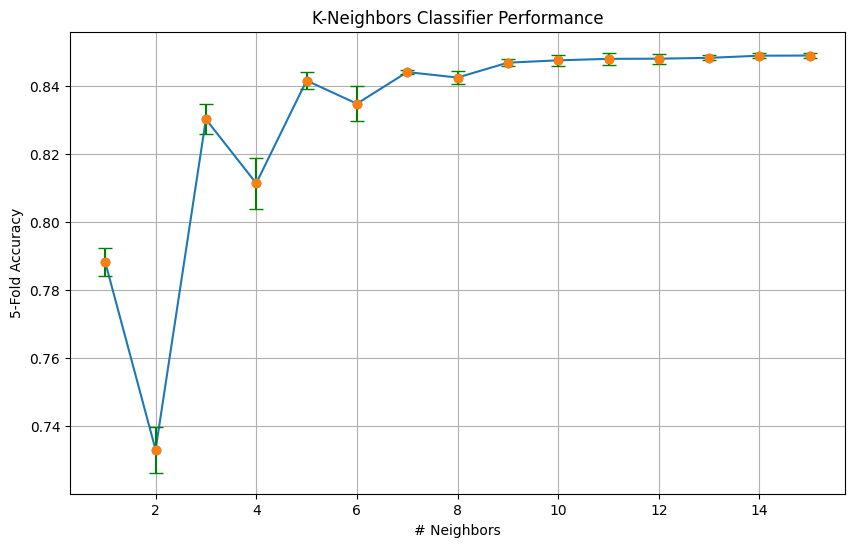

acc (train): 0.85


In [49]:
neighbours = np.arange(1,16, 1)
file_model = 'model_knn_tfidf_simple.pkl'
model_knn(X_train_tfidf_simple,
          y_train,
          neighbours,
          file_model)

## 4.5. Entrenamiento modelo tfidfVectorizer complejo.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   1.9s
[CV] END ......................................n_neighbors=1; total time=   2.2s
[CV] END ......................................n_neighbors=2; total time=   2.6s
[CV] END ......................................n_neighbors=2; total time=   2.2s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=2; total time=   2.1s
[CV] END ......................................n_neighbors=3; total time=   2.4s
[CV] END ......................................n

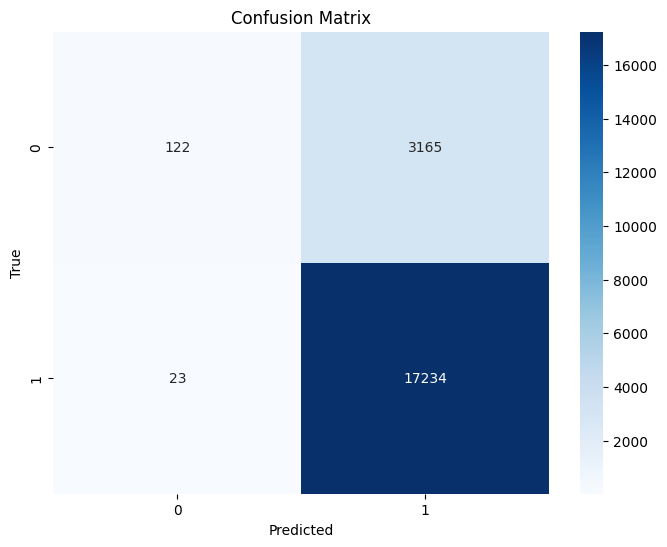

---------------------------------------------
Metricas en Train:
              precision    recall  f1-score   support

           0       0.84      0.04      0.07      3287
           1       0.84      1.00      0.92     17257

    accuracy                           0.84     20544
   macro avg       0.84      0.52      0.49     20544
weighted avg       0.84      0.84      0.78     20544

best mean cross-validation score: 0.842
best parameters: {'n_neighbors': 10}


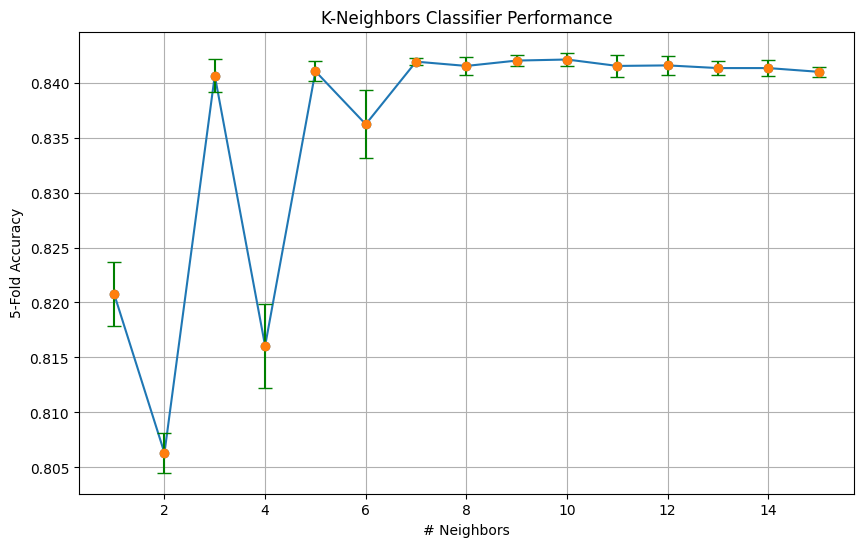

acc (train): 0.84


In [50]:
neighbours = np.arange(1, 16, 1)
file_model = 'model_knn_tfidf_complex.pkl'
model_knn(X_train_tfidf_complex,
          y_train,
          neighbours,
          file_model)

# 5.Conclusiones y metricas

Interpretación de las metricas:

1.**Precisión:**

    Clase 0 (Negativo): 91% de los casos predichos como negativos son realmente negativos.

    Clase 1 (Positivo): 91% de los casos predichos como positivos son realmente positivos.

    Conclusión: El modelo tiene un buen balance en la precisión para ambas clases.

2.**Recall**

    Clase 0 (Negativo): Solo el 48% de los negativos reales se detectan correctamente.Muy bajo, lo que indica que muchos negativos
    se están clasificando erróneamente como positivos (falsos positivos).

    Clase 1 (Positivo):El modelo identifica prácticamente todos los casos positivos.
    Alto recall en la clase mayoritaria es común cuando hay desbalance en los datos.

    Conclusión: El modelo está priorizando la detección de positivos, pero a costa de un bajo recall en la clase negativa.

3.**F1-score (Equilibrio entre Precisión y Recall)**

    Clase 0 (Negativo):Valor bajo debido al bajo recall en esta clase.

    Clase 1 (Positivo): Valor alto porque precisión y recall están muy equilibrados.

    Conclusión: El modelo tiene un excelente desempeño para los positivos pero es malo para detectar negativos.

Conclusión: El modelo está bastante desbalanceado, ya que el dataset tiene una proporción mucho mayor de puntiaciones positivas que negativas.

 Debemos balancear las clases antes de entrenar los modelos. Se reliza este ajuste y se vuelve a probar el entrenamiento en el siguiente notebook